# FunctionalAPIによるMNIST

In [86]:
# import libraries
%matplotlib inline
import pandas as pd
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [87]:
# Download MNIST datasets 
# This datasets include 2 tapples. x_train, x_test(28,28) and y_train, y_test(9 classes).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

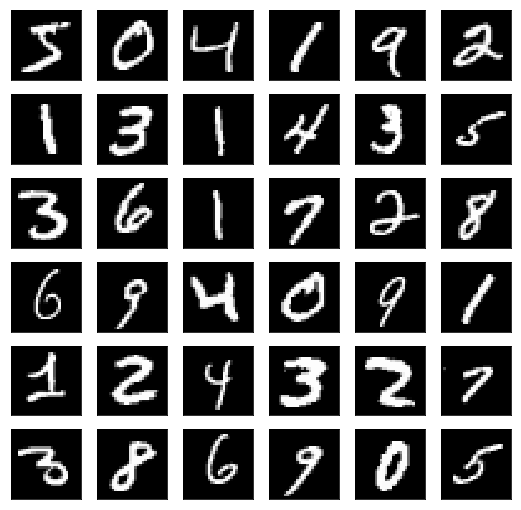

In [88]:
# show sample data
fig = plt.figure(figsize=(9,9))

for i in range(36):
    ax = fig.add_subplot(6, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i], cmap='gist_gray')

In [89]:
# reshape 28*28 pixel data into 784 dim data
# convert into float type and normalize pixel data from 0.0 to 1.0
x_train = x_train.reshape(60000, 784).astype('float32') /255
x_test = x_test.reshape(10000, 784).astype('float32') /255

# encode label data into "one-hot" 
y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'),10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'),10)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s - loss: 0.2443 - acc: 0.9253 - val_loss: 0.1107 - val_acc: 0.9647
Epoch 2/20
60000/60000 [==============================] - 16s - loss: 0.1055 - acc: 0.9688 - val_loss: 0.0840 - val_acc: 0.9754
Epoch 3/20
60000/60000 [==============================] - 17s - loss: 0.0766 - acc: 0.9770 - val_loss: 0.0833 - val_acc: 0.9762
Epoch 4/20
60000/60000 [==============================] - 16s - loss: 0.0600 - acc: 0.9819 - val_loss: 0.0756 - val_acc: 0.9795
Epoch 5/20
60000/60000 [==============================] - 14s - loss: 0.0518 - acc: 0.9843 - val_loss: 0.0768 - val_acc: 0.9810
Epoch 6/20
60000/60000 [==============================] - 15s - loss: 0.0436 - acc: 0.9868 - val_loss: 0.0746 - val_acc: 0.9824
Epoch 7/20
60000/60000 [==============================] - 16s - loss: 0.0393 - acc: 0.9881 - val_loss: 0.0796 - val_acc: 0.9814
Epoch 8/20
60000/60000 [==============================

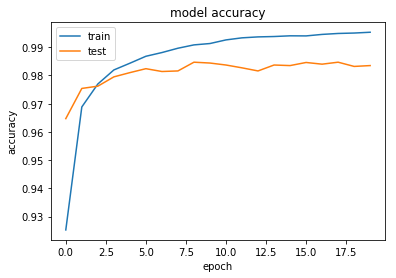

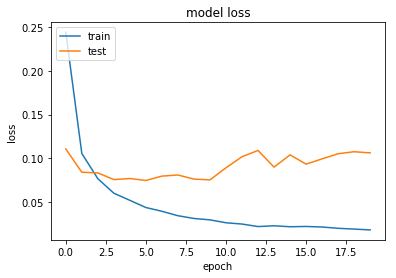

In [90]:
# Sequential Model

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop


# select Sequiential model
model = Sequential()

# 1st layer : fully connected layer(output:512)
# activation methods: ReLU(rectified linear unit)
# only first layer needs to be define input_shape
model.add(Dense(512, activation='relu', input_shape=(784,)))

# use Dropout regularization rate to avoid overfitting
# Randomly ignoring connections between layers 
model.add(Dropout(0.2))

# 2st layer : fully connected layer(output:512)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# 3st layer : fully connected layer(output:10)
# activation methods: softmax, which squashes the outputs of each unit to be between 0 and 1.(often used in the final layer)
model.add(Dense(10, activation='softmax'))

# Set definitions for traning
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

# Excute training for 20(epochs) times
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

# plot the resulut
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.2423 - acc: 0.9248 - val_loss: 0.1101 - val_acc: 0.9669
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.1038 - acc: 0.9684 - val_loss: 0.0871 - val_acc: 0.9745
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.0746 - acc: 0.9767 - val_loss: 0.0885 - val_acc: 0.9734
Epoch 4/20
60000/60000 [==============================] - 9s - loss: 0.0612 - acc: 0.9814 - val_loss: 0.0782 - val_acc: 0.9794
Epoch 5/20
60000/60000 [==============================] - 7s - loss: 0.0507 - acc: 0.9844 - val_loss: 0.0736 - val_acc: 0.9816
Epoch 6/20
60000/60000 [==============================] - 8s - loss: 0.0437 - acc: 0.9868 - val_loss: 0.0754 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 7s - loss: 0.0373 - acc: 0.9889 - val_loss: 0.0912 - val_acc: 0.9798
Epoch 8/20
60000/60000 [==============================] - 7s 

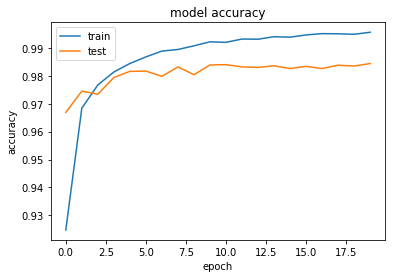

In [91]:
# Functional API

import matplotlib.pyplot as plt
from keras.engine import Model
from keras.layers import Input, Dense, Dropout
from keras.optimizers import RMSprop

# from MnistData import reshapeDataToOneDimension

inputs = Input(shape=(784,))

nw = Dense(512, activation='relu')(inputs)
nw = Dropout(.2)(nw)
nw = Dense(512, activation='relu')(nw)
nw = Dropout(.2)(nw)
predictions = Dense(10, activation='softmax')(nw)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

# (x_train, y_train), (x_test, y_test) = reshapeDataToOneDimension()
history = model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_data=(x_test, y_test))

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
